In [1]:
import numpy as np
import VBMicrolensing
import matplotlib.pyplot as plt
import math

In [2]:
# Initialize VBMicrolensing() class object
VBM = VBMicrolensing.VBMicrolensing()
#Set relative accuracy
VBM.RelTol = 1e-03
#Set accuracy
VBM.Tol=1e-03

VBM.astrometry = True

In [4]:
VBM.TripleAstroLightCurve?

Docstring:
Triple light curve and astrometry for a full array of observations.

Parameters
----------
params : list[float]
    List of parameters [log_s, log_q, u0, alpha, log_rho, log_tE, t0, 
                        log(s13), log(q3), psi
                        paiN, paiE,     #components of the parallax vector
                        muS_N, muS_E,   # proper motion components of the source (mas/yr)
                        pai_S,          # parallax of the source (mas)
                        thetaE          # Einstein angle (mas) 
                        ] 
times : list[float] 
    Array of times at which the magnification is calculated.

Returns
-------
results: list[list[float],list[float],list[float],list[float],list[float],list[float],list[float]] 
    [Magnification array,
        centroid of images N array, centroid of images E array, 
        centroid of lens N array, centroid of lens E array,
        source position y1 array, source position y2 array]
Type:      method

In [6]:
VBM.SetObjectCoordinates("17:51:40.2082 -29:53:26.502"); 

In [ ]:
# Parameters
s12 = 0.9
q2 = 0.028997
u0 = 0.1
alpha = 0.261799
rho = 0.01
tE = 20
t0 = 0
s23 = 1.5
q3 = 0.003270
psi = 0.785398

# Astrometry
paiN = 0.1
paiE = 0.1
muS_N = -3
muS_E = -2
pai_S = 0.12
thetaE = 5.15

# Parameter list
params = [
    math.log(s12), math.log(q2), u0, alpha, math.log(rho), math.log(tE), t0,
    math.log(s23), math.log(q3), psi,
    paiN, paiE, muS_N, muS_E, pai_S, thetaE
]

# Time
t = np.linspace(-3*365.25+t0,3*365.25+t0,10000)

In [ ]:
# Call function
results = VBM.TripleAstroLightCurve(params, t)

: 

In [1]:
import VBMicrolensing
VBM = VBMicrolensing.VBMicrolensing()
import numpy as np
import math
import matplotlib.pyplot as plt

# Standard parameters for PSPL with parallax
t0 = 5034.0
tE = 27.0
u0 = 0.1
paiN = -0.1 
paiE = +0.2

# Additional parameters required for centroid trajectory
muS_Dec = -3.597 # Source proper motion (Dec) in mas/yr
muS_RA = -2.263 # Source proper motion (RA) in mas/yr
paiS = 0.12 # Source parallax in mas
thetaE = 5.15 # Einstein angle in mas

VBM.SetObjectCoordinates("17:51:40.2082 -29:53:26.502");  # Coordinates of the microlensing event

# Here we fill the array of parameters
pr = [u0,math.log(tE),t0, paiN,paiE,     # Standar light curve parameters for PSPL including parallax
     muS_Dec,muS_RA, paiS, thetaE]       # Additional parameters required for centroid trajectory

t = np.linspace(-3*365.25+t0,3*365.25+t0,10000) # Array of observation epochs

results = VBM.PSPLAstroLightCurve(pr,t)
magnifications = results[0]
#plt.plot(t,magnifications) # Here we plot the light curve as usual

In [2]:
VBM.PSPLAstroLightCurve?

Docstring:
PSPL light curve and astrometry for a full array of observations.

Parameters
----------
params : list[float]
     List of parameters [u0, log_tE, t0, 
                        paiN, paiE,     #components of the parallax vector
                        muS_N, muS_E,   # proper motion components of the source (mas/yr)
                        pai_S,          # parallax of the source (mas)
                        thetaE          # Einstein angle (mas) 
 times : list[float] 
    Array of times at which the magnification is calculated.

Returns
-------
results: list[list[float],list[float],list[float],list[float],list[float],list[float],list[float]] 
    [Magnification array,
        centroid of images N array, centroid of images E array, 
        centroid of lens N array, centroid of lens E array,
        source position y1 array, source position y2 array]
Type:      method

Text(0, 0.5, 'dDec (mas)')

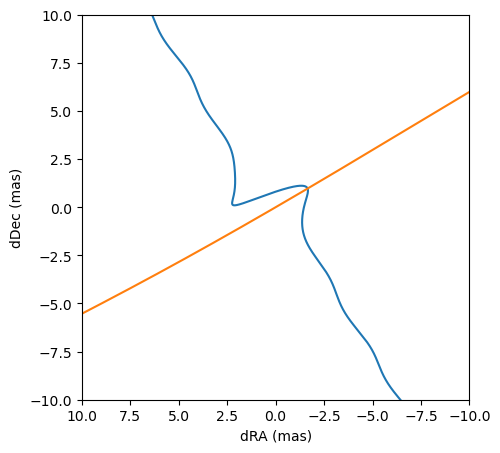

In [3]:
sourcecentroid = [results[1],results[2]]
lenscentroid = [results[3],results[4]]

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(sourcecentroid[1],sourcecentroid[0])
ax.plot(lenscentroid[1],lenscentroid[0])
ran = 10
ax.set_ylim(-ran,ran)
ax.set_xlim(ran,-ran)
ax.set_xlabel('dRA (mas)')
ax.set_ylabel('dDec (mas)')

(3.0, -3.0)

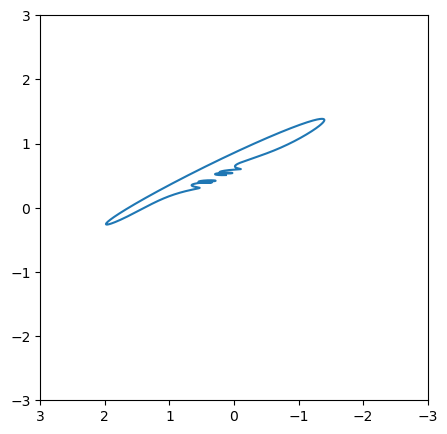

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.array(sourcecentroid[1]) - muS_RA*(t - t0)/365.25,np.array(sourcecentroid[0]) - muS_Dec*(t - t0)/365.25)
ran = 3
ax.set_ylim(-ran,ran)
ax.set_xlim(ran,-ran)

Text(0, 0.5, 'dDec (mas)')

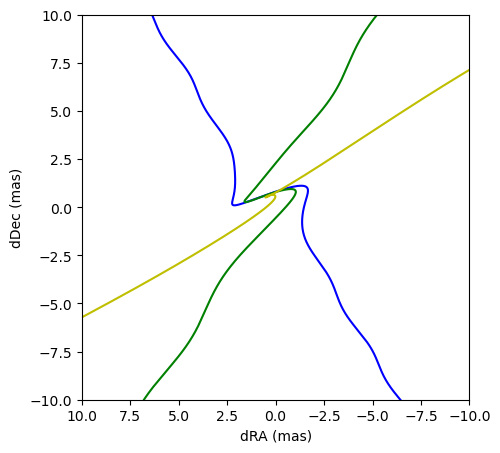

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
g = 0.
combinedcentroid = VBM.CombineCentroids(results,g)
ax.plot(combinedcentroid[1],combinedcentroid[0],'b')
g = 0.1
combinedcentroid = VBM.CombineCentroids(results,g)
ax.plot(combinedcentroid[1],combinedcentroid[0],'g')
g = 1
combinedcentroid = VBM.CombineCentroids(results,g)
ax.plot(combinedcentroid[1],combinedcentroid[0],'y')
ran = 10
ax.set_ylim(-ran,ran)
ax.set_xlim(ran,-ran)
ax.set_xlabel('dRA (mas)')
ax.set_ylabel('dDec (mas)')

In [7]:
VBM?

Type:        VBMicrolensing
String form: <VBMicrolensing.VBMicrolensing.VBMicrolensing object at 0x111f7ffb0>
File:        /opt/anaconda3/envs/TheGuide/lib/python3.12/site-packages/VBMicrolensing/VBMicrolensing.so
Docstring:   <no docstring>

In [9]:
import numpy as np
import VBMicrolensing

def astro_centroid_2L1S(times, *, t0, tE, rho, u0, s, q, alpha_deg,
                        a1=None,
                        thetaE=1.0, paiN=0.0, paiE=0.0, muS_N=0.0, muS_E=0.0, pai_S=0.0):
    """
    Use VBM.BinaryAstroLightCurve to get magnification and astrometric centroid (with optional LD).

    Parameters
    ----------
    times : array-like
        Absolute times at which to evaluate (same units as t0,tE).
    t0, tE, rho, u0, s, q, alpha_deg : floats
        Standard 2L1S parameters (alpha in degrees).
    a1 : float or None
        Linear limb darkening coefficient. None/0.0 → uniform disk. >0 → LD on.
    thetaE, paiN, paiE, muS_N, muS_E, pai_S : floats
        Parallax / scaling params. Set to 0 if you don't model parallax.

    Returns
    -------
    dict with keys:
      'A'    : magnification array
      'cN'   : centroid images North
      'cE'   : centroid images East
      'yN'   : source position North
      'yE'   : source position East
      'dN'   : centroid shift North = cN - yN
      'dE'   : centroid shift East  = cE - yE
    """
    VBM = VBMicrolensing.VBMicrolensing()
    VBM.RelTol = 1e-3
    VBM.Tol = 1e-3
    VBM.astrometry = True

    # Limb darkening setup (linear law).
    VBM.SetLDprofile(VBM.LDlinear)
    VBM.a1 = float(a1) if (a1 is not None and a1 > 0) else 0.0


    params = [
        np.log(s),
        np.log(q),
        float(u0),
        np.radians(alpha_deg),
        np.log(rho),
        np.log(tE),
        float(t0),
        float(paiN), float(paiE),
        float(muS_N), float(muS_E),
        float(pai_S),
        float(thetaE),
    ]

    times = np.asarray(times, dtype=float).tolist()
    # results = [magnification, c1s, c2s, c1l, c2l, y1s, y2s]
    mags, c1s, c2s, c1l, c2l, y1s, y2s = VBM.BinaryAstroLightCurve(params, times)

    # Centroid shift (images – source) in the VBM N/E frame
    c1s = np.array(c1s); c2s = np.array(c2s)
    y1s = np.array(y1s); y2s = np.array(y2s)
    dN = c1s - y1s
    dE = c2s - y2s

    return {
        "A": np.array(mags),
        "cN": c1s, "cE": c2s,
        "yN": y1s, "yE": y2s,
        "dN": dN, "dE": dE,
    }

In [ ]:

t0 = 2458261.929
tE = 4.40305

rho = 0.001

tau_hr = np.linspace(-4, 4, 1000)
times = t0 + tau_hr * tE


out_uniform = astro_centroid_2L1S(times, t0=t0, tE=tE, rho=rho, u0=0.1,
                                  s=1.2, q=1e-3, alpha_deg=25.0, a1=None)

out_ld = astro_centroid_2L1S(times, t0=t0, tE=tE, rho=rho, u0=0.1,
                             s=1.2, q=1e-3, alpha_deg=25.0, a1=0.5)

# centroid shift magnitude
dtheta_uniform = np.hypot(out_uniform["dN"], out_uniform["dE"])
dtheta_ld      = np.hypot(out_ld["dN"], out_ld["dE"])


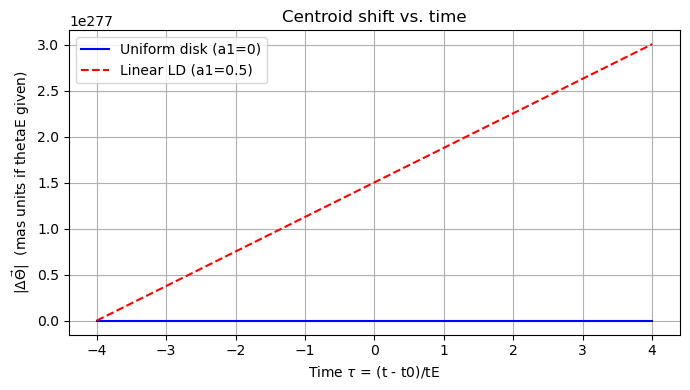

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(tau_hr, dtheta_uniform, label="Uniform disk (a1=0)", color="blue")
plt.plot(tau_hr, dtheta_ld,      label="Linear LD (a1=0.5)", color="red", linestyle="--")

plt.xlabel(r"Time $\tau$ = (t - t0)/tE")
plt.ylabel(r"$|\Delta \vec{\Theta}|$  (mas units if thetaE given)")
plt.title("Centroid shift vs. time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
plt.figure(figsize=(6,6))
plt.plot(out_uniform["dE"], out_uniform["dN"], label="Uniform", color="blue")
plt.plot(out_ld["dE"], out_ld["dN"], label="LD a1=0.5", color="red", linestyle="--")
plt.gca().set_aspect("equal")
plt.xlabel(r"$\Delta\theta_E$")
plt.ylabel(r"$\Delta\theta_N$")
plt.title("Centroid trajectory")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

LinAlgError: Singular matrix

Error in callback <function _draw_all_if_interactive at 0x11b15c4a0> (for post_execute), with arguments args (),kwargs {}:


LinAlgError: Singular matrix

LinAlgError: Singular matrix

<Figure size 600x600 with 1 Axes>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_centroid_trajectory(out_uniform, out_ld, title="Centroid trajectory"):
    # Pull arrays
    dEu, dNu = np.asarray(out_uniform["dE"]), np.asarray(out_uniform["dN"])
    dEl, dNl = np.asarray(out_ld["dE"]),      np.asarray(out_ld["dN"])

    # Keep only finite points
    mu = np.isfinite(dEu) & np.isfinite(dNu)
    ml = np.isfinite(dEl) & np.isfinite(dNl)

    if mu.sum() == 0 and ml.sum() == 0:
        raise ValueError("No finite centroid-shift points to plot.")

    fig, ax = plt.subplots(figsize=(6, 6))

    if mu.any():
        ax.plot(dEu[mu], dNu[mu], label="Uniform (a1=0)", lw=1.8)
    if ml.any():
        ax.plot(dEl[ml], dNl[ml], "--", label="LD (a1=0.5)", lw=1.8)

    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel(r"$\Delta\theta_E$")
    ax.set_ylabel(r"$\Delta\theta_N$")
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

    # Make sure limits aren't identical (avoid zero-span)
    xs = np.concatenate([dEu[mu], dEl[ml]]) if ml.any() else dEu[mu]
    ys = np.concatenate([dNu[mu], dNl[ml]]) if ml.any() else dNu[mu]
    if xs.size:
        xmin, xmax = np.nanmin(xs), np.nanmax(xs)
        if np.isfinite(xmin) and np.isfinite(xmax) and xmin == xmax:
            pad = 1e-6 if xmax == 0 else 1e-3*abs(xmax)
            ax.set_xlim(xmin - pad, xmax + pad)
    if ys.size:
        ymin, ymax = np.nanmin(ys), np.nanmax(ys)
        if np.isfinite(ymin) and np.isfinite(ymax) and ymin == ymax:
            pad = 1e-6 if ymax == 0 else 1e-3*abs(ymax)
            ax.set_ylim(ymin - pad, ymax + pad)

    # tight_layout can fail if renderer hits singular transforms; guard it
    try:
        fig.tight_layout()
    except Exception:
        pass

    plt.show()

# call it
plot_centroid_trajectory(out_uniform, out_ld)


LinAlgError: Singular matrix

<Figure size 600x600 with 1 Axes>

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def safe_centroid_trajectory(out_uniform, out_ld, title=None):
    # Extract
    dEu = np.asarray(out_uniform.get("dE", []), float)
    dNu = np.asarray(out_uniform.get("dN", []), float)
    dEl = np.asarray(out_ld.get("dE", []), float)
    dNl = np.asarray(out_ld.get("dN", []), float)

    # Keep finite
    mu = np.isfinite(dEu) & np.isfinite(dNu)
    ml = np.isfinite(dEl) & np.isfinite(dNl)

    if not mu.any() and not ml.any():
        raise ValueError("No finite centroid-shift points to plot (all NaN/inf).")

    fig, ax = plt.subplots(figsize=(6, 6))

    if mu.any():
        ax.plot(dEu[mu], dNu[mu], lw=1.8, label="Uniform (a1=0)")
    if ml.any():
        ax.plot(dEl[ml], dNl[ml], "--", lw=1.8, label="LD (a1=0.5)")

    ax.set_xlabel(r"$\Delta\theta_E$")
    ax.set_ylabel(r"$\Delta\theta_N$")
    if title:
        ax.set_title(title)
    ax.grid(True)
    ax.legend()

    # Compute combined bounds and ensure non-zero span
    xs = np.concatenate([dEu[mu], dEl[ml]]) if ml.any() else dEu[mu]
    ys = np.concatenate([dNu[mu], dNl[ml]]) if ml.any() else dNu[mu]

    def padded_limits(arr):
        a_min = np.nanmin(arr); a_max = np.nanmax(arr)
        if not np.isfinite(a_min) or not np.isfinite(a_max):
            return (-1, 1)
        if a_min == a_max:
            pad = 1e-9 if a_max == 0 else 1e-3 * abs(a_max)
            a_min -= pad; a_max += pad
        return (a_min, a_max)

    xlim = padded_limits(xs)
    ylim = padded_limits(ys)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

    # Now it's safe to enforce equal aspect
    ax.set_aspect("equal", adjustable="box")

    # Avoid tight_layout (where the singular transform happens)
    plt.show()

# Call it:
safe_centroid_trajectory(out_uniform, out_ld, title="Centroid trajectory")


LinAlgError: Singular matrix

<Figure size 600x600 with 1 Axes>

In [21]:
for name, arr in [("dE_uniform", out_uniform["dE"]),
                  ("dN_uniform", out_uniform["dN"]),
                  ("dE_ld", out_ld["dE"]),
                  ("dN_ld", out_ld["dN"])]:
    arr = np.asarray(arr, float)
    print(name, "finite:", np.isfinite(arr).sum(), "/", arr.size,
          "min:", np.nanmin(arr), "max:", np.nanmax(arr))


dE_uniform finite: 1000 / 1000 min: 556717.6986206673 max: 556720.6352911687
dN_uniform finite: 1000 / 1000 min: -3.5619629925168486 max: 3.688532655718709
dE_ld finite: 1000 / 1000 min: -3.1604069482162245e+202 max: -3.160406948216269e+199
dN_ld finite: 1000 / 1000 min: -3.0037741490274414e+277 max: -3.0037741490274837e+274


In [22]:
import numpy as np
import VBMicrolensing

def astro_centroid_2L1S_safe(tau, *, tE, rho, u0, s, q, alpha_deg,
                             a1=None, thetaE=1.0):
    """
    tau: array of (t - t0)/tE   (dimensionless)
    Returns dict with A, dN, dE, etc., in a no-parallax, relative-time mode.
    """
    VBM = VBMicrolensing.VBMicrolensing()
    VBM.RelTol = 1e-3; VBM.Tol = 1e-3; VBM.astrometry = True

    # turn off parallax if possible
    try:
        VBM.parallaxsystem = 0
    except Exception:
        pass

    # LD
    VBM.SetLDprofile(VBM.LDlinear)
    VBM.a1 = float(a1) if (a1 is not None and a1 > 0) else 0.0

    # build params with t0=0 and times in days relative to t0
    t0 = 0.0
    times = (tau * tE).astype(float).tolist()

    params = [
        np.log(s),
        np.log(q),
        float(u0),
        np.radians(alpha_deg),
        np.log(rho),
        np.log(tE),
        float(t0),
        0.0, 0.0,     # paiN, paiE
        0.0, 0.0,     # muS_N, muS_E
        0.0,          # pai_S
        float(thetaE) # Einstein angle in mas
    ]

    mags, c1s, c2s, c1l, c2l, y1s, y2s = VBM.BinaryAstroLightCurve(params, times)
    c1s = np.array(c1s); c2s = np.array(c2s)
    y1s = np.array(y1s); y2s = np.array(y2s)

    dN = c1s - y1s
    dE = c2s - y2s

    return {"A": np.array(mags), "dN": dN, "dE": dE}


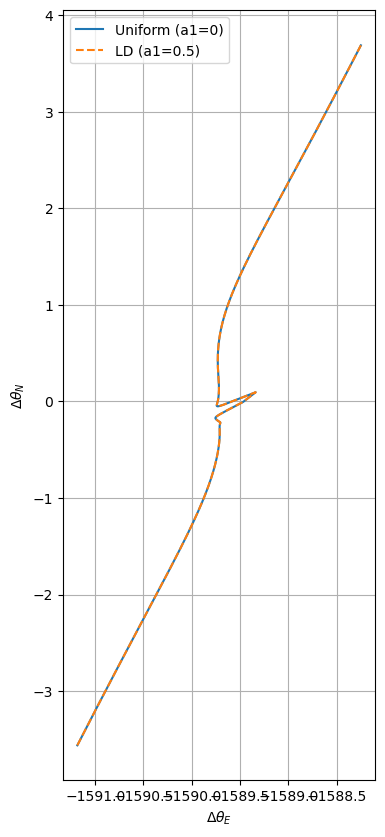

In [ ]:
t0 = 2458261.929
tE = 4.40305
rho = 0.001
tau_hr = np.linspace(-4, 4, 1000)

out_u  = astro_centroid_2L1S_safe(tau_hr, tE=tE, rho=rho, u0=0.1, s=1.2, q=1e-3, alpha_deg=25.0, a1=None)
out_ld = astro_centroid_2L1S_safe(tau_hr, tE=tE, rho=rho, u0=0.1, s=1.2, q=1e-3, alpha_deg=25.0, a1=0.5)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(out_u["dE"],  out_u["dN"],  label="Uniform (a1=0)")
ax.plot(out_ld["dE"], out_ld["dN"], "--", label="LD (a1=0.5)")
ax.set_aspect("equal", adjustable="box")
ax.grid(True); ax.legend()
ax.set_xlabel(r"$\Delta\theta_E$"); ax.set_ylabel(r"$\Delta\theta_N$")
plt.show()
